# Gathering Data

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns


In [2]:
df=pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [6]:
#load image file 
images = pd.read_csv('image_predictions.tsv',sep = '\t')

In [7]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
1633,805932879469572096,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
756,688519176466644993,https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg,1,Pembroke,0.696372,True,Cardigan,0.121052,True,Shetland_sheepdog,0.050592,True
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.023970,False
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
1281,750147208377409536,https://pbs.twimg.com/media/CmkO57iXgAEOxX9.jpg,1,pug,0.977765,True,Boston_bull,0.004794,True,French_bulldog,0.004573,True
594,679503373272485890,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,0.999846,False,meerkat,0.000072,False,echidna,0.000044,False
1651,809448704142938112,https://pbs.twimg.com/media/Czu9RiwVEAA_Okk.jpg,1,Greater_Swiss_Mountain_dog,0.375415,True,Cardigan,0.134317,True,English_springer,0.073697,True


In [9]:
df_list = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [10]:
status_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


In [11]:
df['text'].value_counts()

This is Crawford. He's quite h*ckin good at the selfies. Nose is incredibly boopable. 11/10 would snapchat https://t.co/6F5Rrp472U                                      1
This is Ozzy. He woke up 2 minutes before he had to be ready for the Christmas party. 9/10 classic Ozzy https://t.co/Kt9vmw0Fap                                         1
This is Rocco. He's doing his best. 13/10 someone help him (IG: rocco_roni) https://t.co/qFsl1nnXMv                                                                     1
Meet Millie. She's practicing her dive form for Rio. It's nearly perfect. Dedicated af. 10/10 go for gold pupper https://t.co/SDVkc4m96M                                1
This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm     1
We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t.co/XQlmPTLHPl https://t

In [12]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
df['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [14]:
df['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [15]:
df['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1                                                                                                                                                                        2
https://www.gofundme.com/help-lorenzo-beat-cancer,https://twitter.com/dog_rates/status/860563773140209665/photo/1,https://twitter.com/dog_rates/status/860563773140209665/photo/1                                                                                                                      2
https://twitter.com/dog_rates/status/673295268553605120/photo/1                                                                                                                                                                                                                                        2
https://twitter.com/dog_rates/status/680055455951884288/photo/1                                              

In [16]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
df1=df.copy()
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


# Assessing
timestamp column: sep date of time

timestamp column: convert of object to datetime type

name column: has value none instead of NAN

doggo,floofer,pupper,puppo columns: has value none instead of NAN

name column:convert to upper case

tweet_id column: convert to as string type

calaculate rating.


In [18]:
df1['rating'] = df1['rating_numerator'] / df1['rating_denominator']

In [20]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


# code

In [22]:
df1['timestamp'] = df1['timestamp'].str.slice(start=0, stop=10)

# TEST

In [23]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


# code

In [24]:
df1['timestamp'] = pd.to_datetime(df1.timestamp)

# TEST

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
rating                  

# code

In [26]:
df1.tweet_id= df1.tweet_id.astype('str')

# TEST

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
rating                 

# code

In [28]:
df1.name = df['name'].map(lambda x: x.upper())

# TEST

In [29]:
df1.name

0        PHINEAS
1          TILLY
2         ARCHIE
3          DARLA
4       FRANKLIN
5           NONE
6            JAX
7           NONE
8           ZOEY
9         CASSIE
10          KODA
11         BRUNO
12          NONE
13           TED
14        STUART
15        OLIVER
16           JIM
17          ZEKE
18       RALPHUS
19        CANELA
20        GERALD
21       JEFFREY
22          SUCH
23        CANELA
24          NONE
25          NONE
26          MAYA
27        MINGUS
28         DEREK
29        ROSCOE
          ...   
2326       QUITE
2327           A
2328        NONE
2329        NONE
2330        NONE
2331        NONE
2332        NONE
2333          AN
2334           A
2335          AN
2336        NONE
2337        NONE
2338        NONE
2339        NONE
2340        NONE
2341        NONE
2342        NONE
2343        NONE
2344        NONE
2345         THE
2346         THE
2347           A
2348           A
2349          AN
2350           A
2351        NONE
2352           A
2353          

# code

In [30]:
df1.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

# TEST

In [31]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,PHINEAS,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,TILLY,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,ARCHIE,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,DARLA,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,FRANKLIN,None,None,None,None,1.2


# code

In [32]:
df1['name'].replace('NONE',np.nan,inplace = True)

# TEST

In [33]:
df1.name

0        PHINEAS
1          TILLY
2         ARCHIE
3          DARLA
4       FRANKLIN
5            NaN
6            JAX
7            NaN
8           ZOEY
9         CASSIE
10          KODA
11         BRUNO
12           NaN
13           TED
14        STUART
15        OLIVER
16           JIM
17          ZEKE
18       RALPHUS
19        CANELA
20        GERALD
21       JEFFREY
22          SUCH
23        CANELA
24           NaN
25           NaN
26          MAYA
27        MINGUS
28         DEREK
29        ROSCOE
          ...   
2326       QUITE
2327           A
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333          AN
2334           A
2335          AN
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         THE
2346         THE
2347           A
2348           A
2349          AN
2350           A
2351         NaN
2352           A
2353          

# Tidiness

retweet_count and favorite_count columns: move of status_df to df1 dataset
doggo,floofer,pupper,puppo columns: merged these columns in one column
doggo,floofer,pupper,puppo columns: drop these columns

In [34]:
df1['dog'] = df1['text'].str.extract('(doggo|floofer|pupper|puppo)')


In [35]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,dog
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,PHINEAS,None,None,None,None,1.3,NaN
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,TILLY,None,None,None,None,1.3,NaN
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,ARCHIE,None,None,None,None,1.2,NaN
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,DARLA,None,None,None,None,1.3,NaN
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,FRANKLIN,None,None,None,None,1.2,NaN
5,891087950875897856,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None,1.3,NaN
6,890971913173991426,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,JAX,None,None,None,None,1.3,NaN
7,890729181411237888,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None,1.3,NaN
8,890609185150312448,NaN,NaN,2017-07-27,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,ZOEY,None,None,None,None,1.3,NaN
9,890240255349198849,NaN,NaN,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,CASSIE,doggo,None,None,None,1.4,doggo


# code

In [36]:
df1['dog'].replace('None',np.nan,inplace=True)


# TEST

In [37]:
df1.dog

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        doggo
10         NaN
11         NaN
12       puppo
13         NaN
14       puppo
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29      pupper
         ...  
2326       NaN
2327       NaN
2328       NaN
2329       NaN
2330       NaN
2331       NaN
2332       NaN
2333       NaN
2334       NaN
2335       NaN
2336       NaN
2337       NaN
2338       NaN
2339       NaN
2340       NaN
2341       NaN
2342       NaN
2343       NaN
2344       NaN
2345       NaN
2346       NaN
2347       NaN
2348       NaN
2349       NaN
2350       NaN
2351       NaN
2352       NaN
2353       NaN
2354       NaN
2355       NaN
Name: dog, Length: 2356, dtype: object

# code

In [38]:
df1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace=True)

# code

In [39]:
result = df1.append(status_df, ignore_index=True, sort=False)


# TEST

In [40]:
result

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog,retweet_count,favorite_count,display_text_range
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,PHINEAS,1.3,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,TILLY,1.3,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,ARCHIE,1.2,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,DARLA,1.3,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,FRANKLIN,1.2,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,1.3,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,JAX,1.3,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,1.3,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,ZOEY,1.3,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,CASSIE,1.4,doggo,NaN,NaN,NaN


In [41]:
result.to_csv('twitter_archive_master.csv')


# visualazation

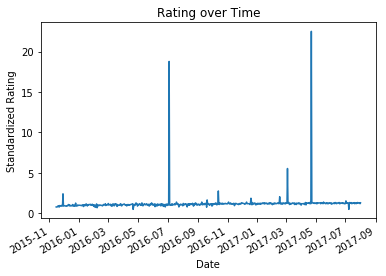

In [42]:

# Plot standardized ratings over time
result.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Date')
plt.ylabel('Standardized Rating')
plt.show;

C:\Users\syed\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\syed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


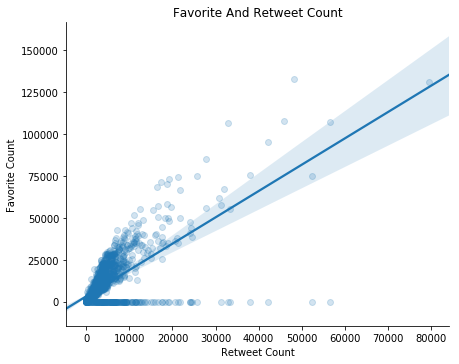

In [43]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=result,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite And Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');